In [1]:
# preliminaries
import pandas as pd
import numpy as np


%matplotlib inline
import random
import matplotlib.pyplot as plt
import math
from math import floor

In [2]:
#Assignment A [25 marks]
#The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. 
#Using data from the HSCIC GP Practice Prescribing dataset for your assigned city only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:
#TTZV5 Coventry

In [3]:
#A1. Calculate the monthly total spending for each GP-practice.

#Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column)

url_praccode = 'http://datagov.ic.nhs.uk/presentation/2017_11_November/T201711ADDR+BNFT.CSV'
cols2 = ['date', 'praccode', 'pracname', 'prac_address', 'prac_street', 'prac_town', 'prac_dist', 'prac_postcode']
praccodenov2017 =  pd.read_csv(url_praccode, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
praccodenov2017['prac_town'] = praccodenov2017['prac_town'].map(str.strip)
praccodenov2017['praccode'] = praccodenov2017['praccode'].map(str.strip)
praccodenov2017['prac_postcode'] = praccodenov2017['prac_postcode'].map(str.strip)


#identify only those with the town designated as coventry
cov_postcode = ("CV1 ", "CV2 ", "CV3 ", "CV4 ", "CV5 ", "CV6 ")
cov_data = praccodenov2017[praccodenov2017['prac_postcode'].str.contains('|'.join(cov_postcode))]
covpraccode = cov_data.praccode.unique()
covpraccode

array(['M84012', 'M86001', 'M86002', 'M86003', 'M86004', 'M86005',
       'M86006', 'M86007', 'M86008', 'M86009', 'M86010', 'M86012',
       'M86013', 'M86014', 'M86015', 'M86016', 'M86017', 'M86018',
       'M86019', 'M86020', 'M86021', 'M86022', 'M86023', 'M86026',
       'M86027', 'M86028', 'M86029', 'M86030', 'M86032', 'M86033',
       'M86034', 'M86035', 'M86037', 'M86038', 'M86039', 'M86040',
       'M86041', 'M86044', 'M86045', 'M86046', 'M86605', 'M86607',
       'M86610', 'M86612', 'M86613', 'M86617', 'M86621', 'M86622',
       'M86624', 'M86627', 'M86048', 'M86631', 'M86633', 'M86638',
       'M86639', 'Y00060', 'Y00140', 'Y00417', 'Y00418', 'Y00419',
       'Y00511', 'Y00992', 'Y00993', 'Y00995', 'Y00996', 'Y00997',
       'Y01130', 'Y01168', 'Y01667', 'Y02318', 'Y02652', 'Y03056',
       'Y03110', 'Y03138', 'Y03185', 'Y03306', 'Y03353', 'Y03398',
       'Y03557', 'Y03558', 'Y04136', 'Y04457', 'Y04682', 'Y04916',
       'Y04947', 'Y04951', 'Y04952', 'Y04965', 'Y05139', 'Y051

In [4]:
#import prescribing data from file
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
pracpx =  pd.read_csv('prescribingDec2015.csv', header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
pracpx['practice'] = pracpx['practice'].map(str.strip)

# get only prescriptions for coventry practice codes
pracpxcov = pracpx[pracpx['practice'].isin (covpraccode)]

# Produce table with total number of prescriptions and their actual cost per GP sugery
costperpractice=pd.DataFrame(pracpxcov.groupby('practice')['act_cost'].sum())
costperpractice['total_px_number'] = (pracpxcov.groupby('practice')['items'].sum())
costperpractice.head()

,act_cost,total_px_number
practice,,
M84012,190420.36,23253
M86001,57061.75,8885
M86002,118447.45,17033
M86003,186619.75,24299
M86004,127859.86,16782


In [5]:
total_px_cov= pracpxcov['items'].sum()
print "Total number of prescriptions in Coventry is: ",total_px_cov
total_act_cost_px_cov = pracpxcov['act_cost'].sum()
print "Total actual cost of prescriptions in Coventry is: £",total_act_cost_px_cov   

Total number of prescriptions in Coventry is:  603690
Total actual cost of prescriptions in Coventry is: £ 4431108.53


In [6]:
#A2.Find the top ten most/least frequently prescribed medications across all practices. 
#What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

cov_px_med = pracpxcov.drop(['sha', 'pct', 'practice', 'period'], axis=1)
merge_cov_px = cov_px_med.groupby(['bnf_code', 'bnf_name'], as_index=False).sum()

#Top 10 most frequently prescribed medications
merge_cov_px.sort_values(by='items', ascending=False).head(10)

,bnf_code,bnf_name,items,nic,act_cost,quantity
106,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,20645,31007.13,29056.28,748452
870,0209000A0AAABAB,Aspirin Disper_Tab 75mg,13791,12300.89,11606.96,419947
948,0212000Y0AAADAD,Simvastatin_Tab 40mg,11116,13614.03,12769.25,343389
2565,0601022B0AAABAB,Metformin HCl_Tab 500mg,10674,45192.06,41954.41,944299
688,0206020A0AAAAAA,Amlodipine_Tab 5mg,9876,9886.17,9298.92,304163
1693,0407010H0AAAMAM,Paracet_Tab 500mg,9377,32216.76,30084.10,1096513
947,0212000Y0AAABAB,Simvastatin_Tab 20mg,8041,8266.11,7770.67,243609
326,0202010B0AAABAB,Bendroflumethiazide_Tab 2.5mg,8009,7413.51,6977.56,250077
979,0301011R0BEAIAP,Ventolin_Evohaler 100mcg (200 D),7934,13935.00,12983.19,9290
542,0205051R0AAADAD,Ramipril_Cap 10mg,6877,9787.21,9152.09,214092


In [7]:
#Top 10 least frequently prescribed medications
merge_cov_px.sort_values(by='items', ascending=False).tail(10)

,bnf_code,bnf_name,items,nic,act_cost,quantity
5325,20090001008,Skinnies Gloves Sml Adult Elasctd Viscos,1,5.29,4.90,2
5324,20090001005,Skinnies Gloves Sml Child Elasctd Viscos,1,5.29,4.90,2
2876,0605010S0BBATBE,Genotropin MiniQuick_Inj 1.6mg Pfs Cart,1,194.74,180.09,7
5322,20090000995,Skinnies Leggings 8-11 Yrs Elasctd Visco,1,17.20,15.92,1
5321,20090000993,Skinnies Leggings 2-5 Yrs Elasctd Viscos,1,41.22,38.13,3
5319,20090000987,Skinnies Vest L/S Sml Adult Elasctd Visc,1,21.27,19.68,1
5318,20090000986,Skinnies Vest L/S 11-14 Yrs Elasctd Visc,1,68.80,63.63,4
5317,20090000985,Skinnies Vest L/S 8-11 Yrs Elasctd Visco,1,17.20,15.92,1
2879,0605010S0BCAFBR,Saizen_Inj 12mg/1.5ml Cart,1,556.32,514.41,2
6565,23965609621,Welland_Curvex Uro Urost Pouch+Flng Clr,1,98.98,91.52,20


In [8]:
top_10 = merge_cov_px.sort_values(by='items', ascending=False).act_cost[:10].sum()
bottom_10 = merge_cov_px.sort_values(by='items', ascending=False).act_cost[-10:].sum()
print "Total cost of 10 most frequently prescribed medications in Coventry is: £",top_10  
print "Total cost of 10 least frequently prescribed medications in Coventry is: £",bottom_10 

Total cost of 10 most frequently prescribed medications in Coventry is: £ 171653.43
Total cost of 10 least frequently prescribed medications in Coventry is: £ 949.1


In [9]:
costperpractice['cost_top_10_overall'] = top_10
costperpractice['cost_bottom_10_overall'] = bottom_10
relative_cost_top_10 = ((costperpractice.cost_top_10_overall/costperpractice.act_cost)*100)
relative_cost_bottom_10 = ((costperpractice.cost_bottom_10_overall/costperpractice.act_cost)*100)
costperpractice['percentage_top_10'] = relative_cost_top_10
costperpractice['percentage_bottom_10'] = relative_cost_bottom_10
costperpractice.head()

,act_cost,total_px_number,cost_top_10_overall,cost_bottom_10_overall,percentage_top_10,percentage_bottom_10
practice,,,,,,
M84012,190420.36,23253,171653.43,949.1,90.144473,0.498424
M86001,57061.75,8885,171653.43,949.1,300.820480,1.663286
M86002,118447.45,17033,171653.43,949.1,144.919481,0.801284
M86003,186619.75,24299,171653.43,949.1,91.980313,0.508574
M86004,127859.86,16782,171653.43,949.1,134.251226,0.742297


In [10]:
overall_relative_cost_top_10 = round((top_10/total_act_cost_px_cov)*100,2)
print "Tbe 10 most frequently prescribed medications in Coventry account for",overall_relative_cost_top_10,"% of the overall actual costs for the city"  

overall_relative_cost_bottom_10 = round((bottom_10/total_act_cost_px_cov)*100, 2)
print  "Tbe 10 least frequently prescribed medications in Coventry account for",overall_relative_cost_bottom_10,"% of the overall actual costs for the city"

Tbe 10 most frequently prescribed medications in Coventry account for 3.87 % of the overall actual costs for the city
Tbe 10 least frequently prescribed medications in Coventry account for 0.02 % of the overall actual costs for the city


In [11]:
#A.3 Find the top ten most expensive medications and calculate their total actual cost.
merge_cov_px.sort_values(by='act_cost', ascending=False).head(10)

,bnf_code,bnf_name,items,nic,act_cost,quantity
2639,0601023X0AAAAAA,Sitagliptin_Tab 100mg,1905,65515.34,60609.44,55154
1016,0301020Q0AAABAB,Tiotropium_Pdr For Inh Cap 18mcg,1846,64158.11,59348.85,57455
1077,0302000C0BQAABX,Fostair_Inh 100mcg/6mcg (120D) CFF,1588,48290.04,44670.85,1647
2565,0601022B0AAABAB,Metformin HCl_Tab 500mg,10674,45192.06,41954.41,944299
2537,0601012W0BBABAB,Ins NovoMix 30_FlexPen 100u/ml 3ml PfPen,955,42240.58,39081.40,7066
2727,0603020J0AAADAD,Hydrocort_Tab 10mg,204,38077.40,35226.79,13501
2533,0601012V0BBAEAD,Ins Lantus SoloStar_100u/ml 3ml Pf Pen,746,35465.90,32813.52,4273
1132,0302000N0BCACAZ,Seretide 500_Accuhaler 500mcg/50mcg(60D),811,34945.68,32322.77,854
1693,0407010H0AAAMAM,Paracet_Tab 500mg,9377,32216.76,30084.10,1096513
2494,0601011A0BBADAC,Ins NovoRapid_FlexPen 100u/ml 3ml Pf Pen,831,31903.56,29521.87,5213


In [12]:
top_10_cost = merge_cov_px.sort_values(by='act_cost', ascending=False).act_cost[:10].sum()
print "Total cost of 10 most expensive medications in Coventry is: £",top_10_cost 

Total cost of 10 most expensive medications in Coventry is: £ 405634.0


In [13]:
#How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

cam_postcode = ("CB1 ", "CB2 ", "CB3 ", "CB4 ", "CB5 ", "CB21 ", "CB22", "CB23", "CB24", "CB25")
cam_data = praccodenov2017[praccodenov2017['prac_postcode'].str.contains('|'.join(cam_postcode))]
campraccode = cam_data.praccode.unique()
campraccode

array(['D81001', 'D81002', 'D81003', 'D81005', 'D81009', 'D81012',
       'D81013', 'D81016', 'D81017', 'D81025', 'D81028', 'D81033',
       'D81035', 'D81037', 'D81041', 'D81042', 'D81043', 'D81044',
       'D81051', 'D81054', 'D81055', 'D81056', 'D81058', 'D81066',
       'D81070', 'D81078', 'D81084', 'D81085', 'D81086', 'D81602',
       'D81607', 'D81612', 'D81637', 'Y00056', 'Y01778', 'Y02991',
       'Y03550', 'Y04184', 'Y04602'], dtype=object)

In [14]:
# get only prescriptions for coventry practice codes
pracpxcam = pracpx[pracpx['practice'].isin (campraccode)]

# Produce table with total number of prescriptions and their actual cost per GP sugery
costperpractice_cam=pd.DataFrame(pracpxcam.groupby('practice')['act_cost'].sum())
costperpractice_cam['total_px_number'] = (pracpxcam.groupby('practice')['items'].sum())
costperpractice_cam.head()

,act_cost,total_px_number
practice,,
D81001,74230.82,8233
D81002,121673.12,16532
D81003,101834.83,12858
D81005,70439.91,6450
D81009,85895.67,10787


In [15]:
total_px_cam= pracpxcam['items'].sum()
print "Total number of prescriptions in Cambridge is: ",total_px_cam
total_act_cost_px_cam = pracpxcam['act_cost'].sum()
print "Total actual cost of prescriptions in Cambridge is: £",total_act_cost_px_cam 

Total number of prescriptions in Cambridge is:  367758
Total actual cost of prescriptions in Cambridge is: £ 2792596.18


In [16]:
# compare coventry prescribing to cambridge

total_px_cov = float(total_px_cov)
total_px_cam = float(total_px_cam)
perc_cov_cam_freq= round((total_px_cov/total_px_cam)*100,2)
print "The number of prescriptions in Coventry is",perc_cov_cam_freq,"% of prescriptions in Cambridge."

perc_cov_cam_cost = round((total_act_cost_px_cov/total_act_cost_px_cam)*100,2)
print  "The cost of prescriptions in Coventry is",perc_cov_cam_cost,"% of prescriptions in Cambridge."


The number of prescriptions in Coventry is 164.15 % of prescriptions in Cambridge.
The cost of prescriptions in Coventry is 158.67 % of prescriptions in Cambridge.


In [126]:
# Pandas dataframes can also be queried using SLQL! 
# The code snippet below gives you an example of how to execute an SQL statement using pandasql. 
#Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

!pip install -U pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
Practices_df_A = pd.DataFrame(praccodenov2017)

Requirement already up-to-date: pandasql in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages
Requirement already up-to-date: numpy in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from pandasql)
Requirement already up-to-date: sqlalchemy in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from pandasql)
Requirement already up-to-date: pandas in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from pandasql)
Requirement already up-to-date: pytz>=2011k in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from pandas->pandasql)
Requirement already up-to-date: python-dateutil in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from pandas->pandasql)
Requirement already up-to-date: six>=1.5 in c:\users\leen1\appdata\local\continuum\anaconda2\lib\site-packages (from python-dateutil->pandas->pandasql)


In [133]:
#sqldf.execute("SELECT COUNT(prac_code), prac_town, prac_dist FROM praccodenov2017 GROUP BY prac_town ORDER BY COUNT (practice) DESC;").head

q="""
    SELECT 
        SUM(prac_code)
        , prac_town
        , prac_dist 
    FROM 
        Practices_df_A
    GROUP BY 
        prac_town 

        """
print sqldf(q, locals())

PandaSQLException: (sqlite3.OperationalError) no such table: Practices_df_A [SQL: '\n    SELECT \n        SUM(prac_code)\n        , prac_town\n        , prac_dist \n    FROM \n        Practices_df_A\n    GROUP BY \n        prac_town \n\n        '] (Background on this error at: http://sqlalche.me/e/e3q8)

In [19]:
#Assignment B
#B1.Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

practice_spend = pracpx.drop(['sha', 'pct', 'bnf_code', 'bnf_name', 'items', 'quantity', 'period', 'nic'], axis=1)

# Calculate the monthly total spending for each GP-practice.
merge_practice_spend = practice_spend.groupby(['practice'], as_index=False).sum()
merge_practice_spend.sort_values(by='act_cost', ascending=False).head(10)

,practice,act_cost
5976,M85063,923786.26
593,B82005,693208.84
4565,J82155,635726.91
4899,K83002,592576.17
1847,D82044,579644.99
1286,C83019,547071.55
612,B82026,535822.74
5327,L83100,534949.83
7797,Y01008,529974.70
1382,C84024,522974.59


In [20]:
#B.2 Use the number of registered patients in each GP-practice to calculate the relative costs per patient
url_hscicgp = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
fields = ['GP_PRACTICE_CODE', 'Total_All']
pt_at_surgery = pd.read_csv(url_hscicgp, usecols=fields).rename(columns=lambda x: x.strip())
pt_at_surgery.columns = ['practice', 'no_pts']

relative_cost = pd.merge(merge_practice_spend, pt_at_surgery, on='practice')

relative_cost['cost_per_pt'] = relative_cost.apply(lambda row: row['act_cost'] / row['no_pts'], axis=1)
relative_cost.head()

,practice,act_cost,no_pts,cost_per_pt
0,A81001,83220.57,4234,19.655307
1,A81002,333514.67,19691,16.937417
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443


(0, 60352.0)

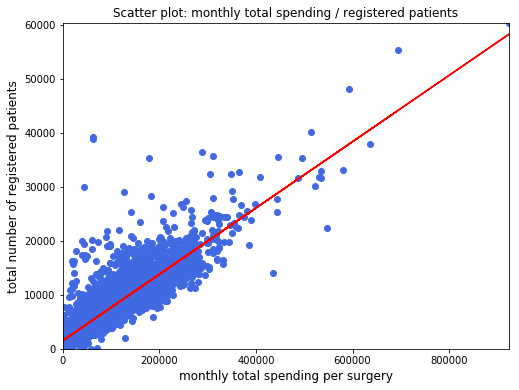

In [21]:
#Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot
#show a trend line, and visualize the data for your city within the national scatterplot

fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= relative_cost['act_cost']
y = relative_cost['no_pts']
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("monthly total spending per surgery",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(relative_cost.act_cost.max())
max_y = floor(relative_cost.no_pts.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

In [22]:
relative_cost['coventry_rel_cost'] = np.where(relative_cost['practice'].isin (covpraccode), 'yes', 'no')

relative_cost_cov = relative_cost[relative_cost['coventry_rel_cost'] == "yes"]
relative_cost_cov.head()

,practice,act_cost,no_pts,cost_per_pt,coventry_rel_cost
5759,M84012,190420.36,12675,15.023303,yes
5998,M86001,57061.75,4666,12.229265,yes
5999,M86002,118447.45,7949,14.900925,yes
6000,M86003,186619.75,17376,10.740087,yes
6001,M86004,127859.86,18081,7.071504,yes


(0, 60352.0)

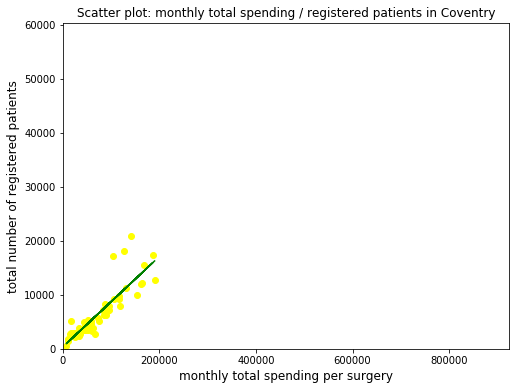

In [23]:
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= relative_cost_cov['act_cost']
y = relative_cost_cov['no_pts']

ax.scatter(x, y, color='yellow') 
       
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='green')
ax.set_title('Scatter plot: monthly total spending / registered patients in Coventry')
ax.set_xlabel("monthly total spending per surgery",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(relative_cost.act_cost.max())
max_y = floor(relative_cost.no_pts.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

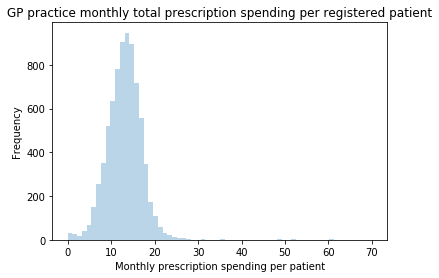

In [24]:
#Visualize the relative costs per patient of all national GP-practices in a histogram.

plt.hist(relative_cost['cost_per_pt'], bins=64, range=(0, 70), normed=False, alpha=0.3)

plt.title("GP practice monthly total prescription spending per registered patient")
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")
plt.show()

In [25]:
#Use descriptive statistics to show how your assigned city compares to the national level.

relative_cost_cov['cost_per_pt'].describe()

count    60.000000
mean     11.720177
std       3.381532
min       3.418058
25%      10.455188
50%      11.786247
75%      13.590969
max      24.240979
Name: cost_per_pt, dtype: float64

In [26]:
relative_cost['cost_per_pt'].describe()

count     7701.000000
mean        21.317316
std        665.570655
min          0.001872
25%         10.689451
50%         13.212266
75%         15.504289
max      58319.780000
Name: cost_per_pt, dtype: float64

In [27]:
#Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

In [28]:
#Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

bnf_statin = "Simvastatin", "Atorvastatin", "Rosuvastatin", "Pravastatin", "Fluvastatin"
statin_data = pracpx[pracpx['bnf_name'].str.contains('|'.join(bnf_statin))]
statin_data.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512


In [29]:
pt_at_surgery['practice'] = pt_at_surgery['practice'].map(str.strip)
pt_at_surgery.head()

,practice,no_pts
0,A81001,4234
1,A81002,19691
2,A81003,3357
3,A81004,9151
4,A81005,7883


In [30]:
relative_cost_statin = pd.merge(statin_data, pt_at_surgery, on='practice')
statin_spend_per_practice=pd.DataFrame(relative_cost_statin.groupby(['practice', 'no_pts'])['act_cost'].sum())
statin_spend_per_practice.reset_index(inplace=True)
statin_spend_per_practice['cost_statins_per_patient'] = statin_spend_per_practice.apply(lambda row:row['act_cost'] / row['no_pts'], axis=1)
statin_spend_per_practice.head()

,practice,no_pts,act_cost,cost_statins_per_patient
0,A81001,4234,1816.80,0.429098
1,A81002,19691,6513.51,0.330786
2,A81003,3357,868.39,0.258680
3,A81004,9151,2134.60,0.233264
4,A81005,7883,1887.11,0.239390


In [31]:
#C2.Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

url_deprivation_by_postcode = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'
fields1 = ['Postcode', 'Index of Multiple Deprivation Rank']
IMDR_by_postcode = pd.read_csv(url_deprivation_by_postcode, usecols=fields1).rename(columns=lambda x: x.strip())
IMDR_by_postcode.columns = ['prac_postcode', 'IMDR']
IMDR_by_postcode['prac_postcode'] = IMDR_by_postcode['prac_postcode'].map(str.strip)

cov_IMDR_per_practice = pd.merge(IMDR_by_postcode, cov_data,how='right', on='prac_postcode', sort=False)
cov_IMDR_per_practice.head()

,prac_postcode,IMDR,date,praccode,pracname,prac_address,prac_street,prac_town,prac_dist
0,CV6 2FL,10133.0,201711,M84012,PARK LEYS MEDICAL PRACTICE,PARK LEYS MED PRACTICE,KERESLEY GREEN MED CENTRE,COVENTRY,WEST MIDLANDS
1,CV6 2FL,10133.0,201711,M84012,PARK LEYS MEDICAL PRACTICE,PARK LEYS MED PRACTICE,KERESLEY GREEN MED CENTRE,COVENTRY,WEST MIDLANDS
2,CV6 2FL,10133.0,201711,M86021,SPRINGFIELD MEDICAL PRACTICE,SPRINGFIELD MED PRACTICE,BENNETTS ROAD SOUTH,KERESLEY,COVENTRY
3,CV6 2FL,10133.0,201711,M86021,SPRINGFIELD MEDICAL PRACTICE,SPRINGFIELD MED PRACTICE,BENNETTS ROAD SOUTH,KERESLEY,COVENTRY
4,CV3 3DG,6969.0,201711,M86001,WILLENHALL PRIMARY CARE CENTRE - 1,WILLENHALL PRIM CRE CTR-1,REMEMBRANCE ROAD,COVENTRY,WEST MIDLANDS


In [32]:
#C3.Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. 
#Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). 
#Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [33]:
statin_spend_per_practice.sort_values(by=['cost_statins_per_patient'])
statin_spend_per_practice.head()

,practice,no_pts,act_cost,cost_statins_per_patient
0,A81001,4234,1816.80,0.429098
1,A81002,19691,6513.51,0.330786
2,A81003,3357,868.39,0.258680
3,A81004,9151,2134.60,0.233264
4,A81005,7883,1887.11,0.239390


In [34]:
statin_spend_per_practice['decile'] = pd.qcut(statin_spend_per_practice['cost_statins_per_patient'], 10, labels=False)

top_decile = statin_spend_per_practice[statin_spend_per_practice['decile']==9].copy(deep=True)
bottom_decile = statin_spend_per_practice[statin_spend_per_practice['decile']==0].copy(deep=True)

top_decile.head()

,practice,no_pts,act_cost,cost_statins_per_patient,decile
0,A81001,4234,1816.80,0.429098,9
7,A81008,4027,1398.07,0.347174,9
12,A81014,3821,1344.87,0.351968,9
22,A81025,4162,1863.48,0.447737,9
57,A81066,4281,1638.63,0.382768,9


In [35]:
bottom_decile.head()

,practice,no_pts,act_cost,cost_statins_per_patient,decile
70,A81621,2245,177.98,0.079278,0
74,A81630,712,15.45,0.021699,0
76,A81632,664,31.51,0.047455,0
77,A81633,917,11.69,0.012748,0
78,A81634,1533,32.48,0.021187,0


In [36]:
IMDR_per_practice = pd.merge(IMDR_by_postcode, praccodenov2017, how='right', on='prac_postcode', sort=False)
IMDR_per_practice.head()

,prac_postcode,IMDR,date,praccode,pracname,prac_address,prac_street,prac_town,prac_dist
0,TS18 1HU,73.0,201711,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
1,TS18 1HU,73.0,201711,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
2,TS18 1HU,73.0,201711,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
3,TS18 1HU,73.0,201711,A81025,THE DOVECOT SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND
4,TS18 1HU,73.0,201711,A81632,LAWSON STREET PRACTICE,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND


In [37]:
IMDR_per_practice_slim = IMDR_per_practice.drop(['prac_postcode', 'date', 'pracname', 'prac_address', 'prac_street', 'prac_town', 'prac_dist'], axis=1)
IMDR_per_practice_slim.columns = ['IMDR', 'practice']
IMDR_per_practice_slim.head()

,IMDR,practice
0,73.0,A81025
1,73.0,A81025
2,73.0,A81025
3,73.0,A81025
4,73.0,A81632


In [38]:
IMDR_top_decile = pd.merge(IMDR_per_practice_slim, top_decile, how='right', on='practice', sort=False)
IMDR_top_decile.head()

,IMDR,practice,no_pts,act_cost,cost_statins_per_patient,decile
0,73.0,A81025,4162,1863.48,0.447737,9
1,73.0,A81025,4162,1863.48,0.447737,9
2,73.0,A81025,4162,1863.48,0.447737,9
3,73.0,A81025,4162,1863.48,0.447737,9
4,6011.0,A81014,3821,1344.87,0.351968,9


In [39]:
IMDR_top_decile['IMDR'].describe()

count      965.000000
mean     12259.590674
std       9257.010228
min         43.000000
25%       3703.000000
50%      10635.000000
75%      19640.000000
max      32639.000000
Name: IMDR, dtype: float64

In [40]:
IMDR_bottom_decile = pd.merge(IMDR_per_practice_slim, bottom_decile, how='right', on='practice', sort=False)
IMDR_bottom_decile.head()

,IMDR,practice,no_pts,act_cost,cost_statins_per_patient,decile
0,73.0,A81632,664,31.51,0.047455,0
1,73.0,A81632,664,31.51,0.047455,0
2,73.0,A81632,664,31.51,0.047455,0
3,73.0,A81632,664,31.51,0.047455,0
4,59.0,Y02483,4947,480.59,0.097148,0


In [41]:
IMDR_bottom_decile['IMDR'].describe()

count     1045.000000
mean     10642.458373
std       8697.462961
min         27.000000
25%       3718.000000
50%       8461.000000
75%      16273.000000
max      32837.000000
Name: IMDR, dtype: float64

In [42]:
#Identify for all GP-practices the associated nine English regions. 
#Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [53]:
fieldsONS = ['Postcode 3', 'Region Name']
ONS_postcode = pd.read_csv('postcodes2015.csv', usecols=fieldsONS).rename(columns=lambda x: x.strip())
ONS_postcode.columns = ['prac_postcode', 'region']
ONS_postcode.head()

,prac_postcode,region
0,S20 6RU,Yorkshire and The Humber
1,TW4 7BD,London
2,GU51 3ZQ,South East
3,OX4 6BE,South East
4,TA7 9JH,South West


In [55]:
region_per_practice = pd.merge(praccodenov2017, ONS_postcode, how='left', on='prac_postcode', sort=False)
region_per_practice.head()

,date,praccode,pracname,prac_address,prac_street,prac_town,prac_dist,prac_postcode,region
0,201711,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,North East
1,201711,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB,North East
2,201711,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,North East
3,201711,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT,North East
4,201711,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW,North East


In [56]:
url_u75_CVD_mortality = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'
fields2 = ['Year', 'Breakdown', 'Level description', 'Gender', 'Age', 'Indicator value']
u75_CVD_mortality =  pd.read_csv(url_u75_CVD_mortality, usecols=fields2).rename(columns=lambda x: x.strip())
u75_CVD_mortality.columns = ['year', 'breakdown', 'level', 'gender', 'age', 'indicator_value']
u75_CVD_mortality.tail()

,year,breakdown,level,gender,age,indicator_value
1045,2009,Deprivation decile,6,Male,All,110.2
1046,2009,Deprivation decile,7,Male,All,104.4
1047,2009,Deprivation decile,8,Male,All,96
1048,2009,Deprivation decile,9,Male,All,85.8
1049,2009,Deprivation decile,10 - Least deprived,Male,All,75.5


In [137]:
reg_2015_u75_CVD_mortality = u75_CVD_mortality[(u75_CVD_mortality['year'] == 2015)& (u75_CVD_mortality['gender'] == "Person") & (u75_CVD_mortality['age'] == "All") & (u75_CVD_mortality['breakdown'] == "Region")]
reg_2015_u75_CVD_mortality.head(50)
#? need CIs

,year,breakdown,level,gender,age,indicator_value
471,2015,Region,East Midlands,Person,All,76.7
472,2015,Region,East of England,Person,All,66.3
473,2015,Region,London,Person,All,76.7
474,2015,Region,North East,Person,All,86
475,2015,Region,North West,Person,All,88.3
476,2015,Region,South East,Person,All,60.8
477,2015,Region,South West,Person,All,64.5
478,2015,Region,West Midlands,Person,All,77.9
479,2015,Region,Yorkshire and The Humber,Person,All,82.8


In [138]:
#Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. 
#Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

statin_spend_per_practice.columns = ['praccode', 'no_pts', 'act_cost', 'cost_statins_per_patient', 'decile']
statin_spend_per_practice.head()

,praccode,no_pts,act_cost,cost_statins_per_patient,decile
0,A81001,4234,1816.80,0.429098,9
1,A81002,19691,6513.51,0.330786,8
2,A81003,3357,868.39,0.258680,6
3,A81004,9151,2134.60,0.233264,5
4,A81005,7883,1887.11,0.239390,6


In [139]:
statin_spend_with_region = pd.merge(statin_spend_per_practice, region_per_practice, how='left', on='praccode', sort=False)
statin_spend_per_region = pd.DataFrame(statin_spend_with_region.groupby('region')['act_cost'].sum())

TypeError: a float is required

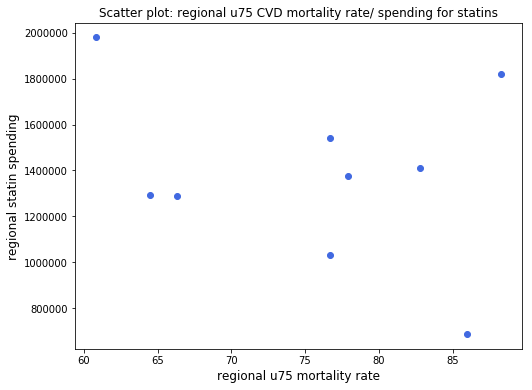

In [146]:
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= reg_2015_u75_CVD_mortality['indicator_value']
y = statin_spend_per_region['act_cost']
ax.scatter(x, y, color='royalblue')
ax.set_title('Scatter plot: regional u75 CVD mortality rate/ spending for statins')
ax.set_xlabel("regional u75 mortality rate",fontsize=12)
ax.set_ylabel("regional statin spending",fontsize=12)
max_x = floor(reg_2015_u75_CVD_mortality.indicator_value.max())


max_y = floor(statin_spend_per_region.act_cost.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

In [68]:
#Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere, Switzerland, and one in the Southern hemisphere, Argentina. 
#For each of country:
#1. Provide a visualisation of the seasonal patterns across all years.

#import the flu trends data for switzerland, northern hemisphere
url_ch = 'https://www.google.org/flutrends/about/data/flu/ch/data.txt'
switzerlandFluTrends = pd.read_csv(url_ch, sep=',', header = 8)
switzerlandFluTrends['Date'] = pd.to_datetime(switzerlandFluTrends['Date'])

#import flu trends data for Argentina, southern hemisphere
url_ar = 'https://www.google.org/flutrends/about/data/flu/ar/data.txt'
argentinaFluTrends = pd.read_csv(url_ar, sep=',', header = 8)
argentinaFluTrends['Date'] = pd.to_datetime(argentinaFluTrends['Date'])

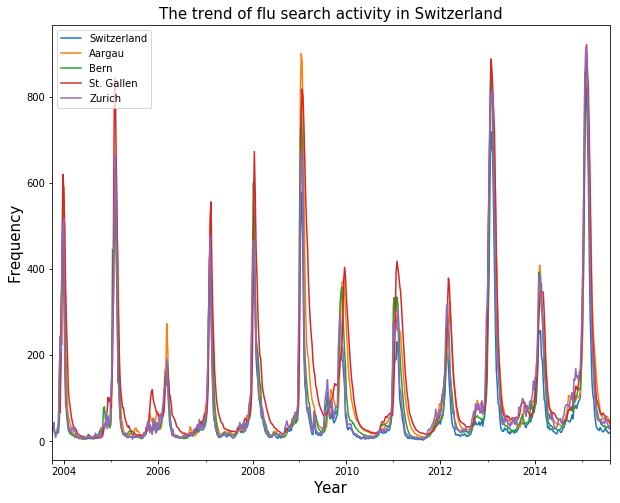

In [69]:
%matplotlib inline
fig_ch = switzerlandFluTrends.plot(x='Date', figsize=(10,8))
fig_ch.set_title('The trend of flu search activity in Switzerland',fontsize=15)
fig_ch.set_ylabel('Frequency',fontsize=15)
fig_ch.set_xlabel('Year',fontsize=15)

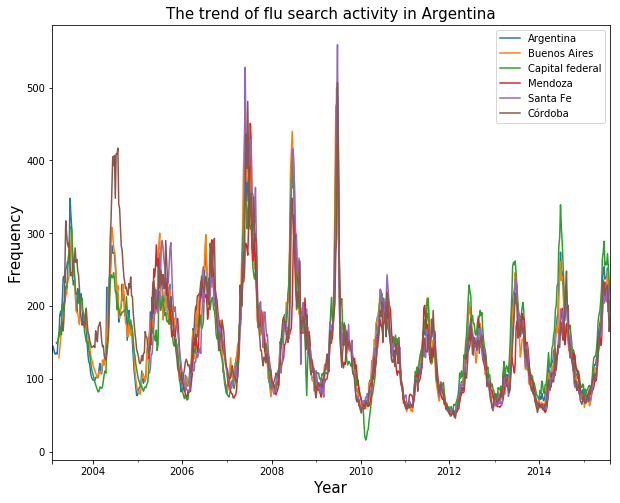

In [70]:
%matplotlib inline
fig_ar = argentinaFluTrends.plot(x='Date', figsize=(10,8))
fig_ar.set_title('The trend of flu search activity in Argentina',fontsize=15)
fig_ar.set_ylabel('Frequency',fontsize=15)
fig_ar.set_xlabel('Year',fontsize=15)

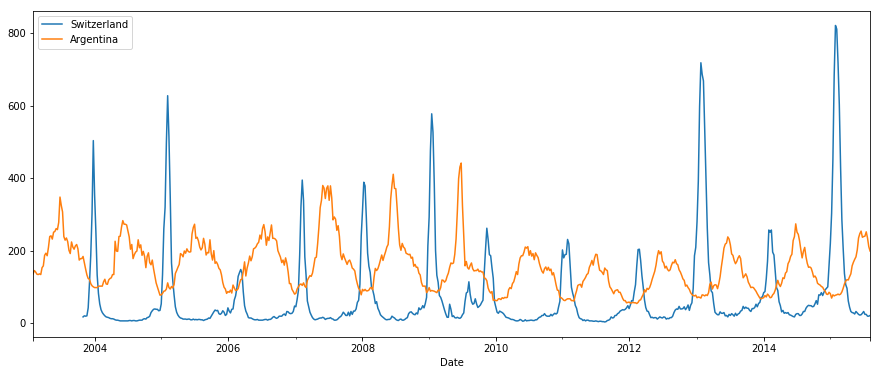

In [71]:
#visualise the seasonal patterns for flu trends in switzerland
ax = switzerlandFluTrends.plot(legend ='left', x='Date', y = 'Switzerland', figsize=(15, 6), grid=True)

#add the seasonal flu trends for argentina
argentinaFluTrends.plot(x='Date', y = 'Argentina' , ax=ax)

In [90]:
#Calculate the yearly minimum and maximum for each country.
switzerlandFluTrends['Date'] = pd.to_datetime(switzerlandFluTrends['Date'])
switzerlandFluTrends.index = switzerlandFluTrends['Date'] 
switzerlandFluTrendsmax = switzerlandFluTrends.resample('A').max()
switzerlandFluTrendsmax

,Date,Switzerland,Aargau,Bern,St. Gallen,Zurich
Date,,,,,,
2003-12-31,2003-12-28,504.0,473.0,612.0,620.0,493
2004-12-31,2004-12-26,354.0,592.0,390.0,582.0,518
2005-12-31,2005-12-25,628.0,659.0,543.0,844.0,663
2006-12-31,2006-12-31,148.0,273.0,182.0,164.0,192
2007-12-31,2007-12-30,395.0,432.0,461.0,556.0,476
2008-12-31,2008-12-28,389.0,494.0,600.0,673.0,467
2009-12-31,2009-12-27,578.0,900.0,763.0,818.0,674
2010-12-31,2010-12-26,139.0,258.0,110.0,333.0,172
2011-12-31,2011-12-25,231.0,312.0,335.0,418.0,304


In [91]:
switzerland_max = round(switzerlandFluTrendsmax["Switzerland"].mean(), 2)
print switzerland_max

413.31


In [92]:
switzerlandFluTrendsmin = switzerlandFluTrends.resample('A').min()
switzerlandFluTrendsmin

,Date,Switzerland,Aargau,Bern,St. Gallen,Zurich
Date,,,,,,
2003-12-31,2003-10-05,17.0,26.0,18.0,67.0,9
2004-12-31,2004-01-04,6.0,6.0,5.0,7.0,6
2005-12-31,2005-01-02,7.0,13.0,6.0,12.0,5
2006-12-31,2006-01-01,8.0,8.0,6.0,14.0,8
2007-12-31,2007-01-07,8.0,15.0,10.0,20.0,8
2008-12-31,2008-01-06,7.0,12.0,10.0,18.0,10
2009-12-31,2009-01-04,13.0,25.0,19.0,59.0,15
2010-12-31,2010-01-03,5.0,18.0,9.0,19.0,7
2011-12-31,2011-01-02,3.0,10.0,7.0,16.0,6


In [93]:
switzerland_min = round(switzerlandFluTrendsmin["Switzerland"].mean(), 2)
print switzerland_min

10.62


In [83]:
argentinaFluTrends['Date'] = pd.to_datetime(argentinaFluTrends['Date'])
argentinaFluTrends.index = argentinaFluTrends['Date'] 
argentinaFluTrendsmax = argentinaFluTrends.resample('A').max()
argentinaFluTrendsmax

,Date,Argentina,Buenos Aires,Capital federal,Mendoza,Santa Fe,Córdoba
Date,,,,,,,
2003-12-31,2003-12-28,348,300.0,309.0,NaN,NaN,317.0
2004-12-31,2004-12-26,283,308.0,246.0,NaN,NaN,417.0
2005-12-31,2005-12-25,273,300.0,220.0,284.0,290.0,290.0
2006-12-31,2006-12-31,272,298.0,241.0,291.0,254.0,293.0
2007-12-31,2007-12-30,380,490.0,361.0,451.0,528.0,481.0
2008-12-31,2008-12-28,411,440.0,399.0,325.0,416.0,348.0
2009-12-31,2009-12-27,442,476.0,500.0,487.0,559.0,507.0
2010-12-31,2010-12-26,211,223.0,217.0,213.0,243.0,219.0
2011-12-31,2011-12-25,190,211.0,211.0,201.0,169.0,194.0


In [85]:
argentina_max = round(argentinaFluTrendsmax["Argentina"].mean(), 2)
print argentina_max

290.46


In [86]:
argentinaFluTrendsmin = argentinaFluTrends.resample('A').min()
argentinaFluTrendsmin

,Date,Argentina,Buenos Aires,Capital federal,Mendoza,Santa Fe,Córdoba
Date,,,,,,,
2003-12-31,2003-02-02,100,124.0,110.0,NaN,NaN,143.0
2004-12-31,2004-01-04,77,90.0,82.0,NaN,NaN,126.0
2005-12-31,2005-01-02,78,79.0,83.0,110.0,108.0,98.0
2006-12-31,2006-01-01,80,85.0,71.0,75.0,83.0,100.0
2007-12-31,2007-01-07,78,76.0,75.0,74.0,87.0,95.0
2008-12-31,2008-01-06,84,83.0,77.0,78.0,79.0,80.0
2009-12-31,2009-01-04,63,65.0,82.0,75.0,62.0,61.0
2010-12-31,2010-01-03,62,59.0,16.0,62.0,56.0,53.0
2011-12-31,2011-01-02,56,55.0,57.0,54.0,55.0,55.0


In [87]:
argentina_min = round(argentinaFluTrendsmin["Argentina"].mean(), 2)
print argentina_min

72.15


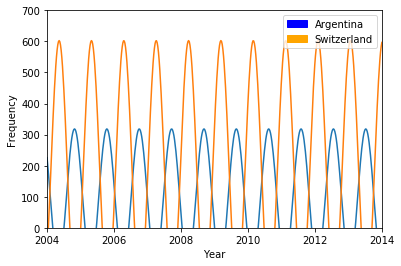

In [112]:
#Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

import matplotlib.patches as mpatches

arg_amplitude = argentina_max-argentina_min
ch_amplitude = switzerland_max-switzerland_min

X = np.linspace(2004,2014, 500)
C, S = arg_amplitude*np.cos(X*6.5)+100, ch_amplitude*np.sin((X+50)*6.5)+200

plt.plot(X, C, )
plt.plot(X, S, )
plt.xlim(2004, 2014)
plt.ylim(0, 700)

orange_patch = mpatches.Patch(color='orange', label='Switzerland')
blue_patch = mpatches.Patch(color='blue', label='Argentina')
plt.legend(handles=[blue_patch, orange_patch])

plt.xlabel('Year')
plt.ylabel('Frequency')

plt.show()